## Step 1: Install AutoGluon

In [1]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

## Step 2: Import Required Libraries

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Step 3: Load California Housing Dataset (Small Subset)

In [3]:
# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)

# Create a DataFrame with features and target
df_full = california.frame

print("="*80)
print("CALIFORNIA HOUSING DATASET")
print("="*80)
print(f"\nFull dataset shape: {df_full.shape}")

# Take a small random sample for fast training
SAMPLE_SIZE = 500  # Using only 500 samples for fast training
df = df_full.sample(n=SAMPLE_SIZE, random_state=42).reset_index(drop=True)

print(f"Small sample shape: {df.shape}")
print(f"\n⚡ Using only {SAMPLE_SIZE} samples for FAST training!")

print("\n" + "="*80)
print("DATASET PREVIEW")
print("="*80)
print(df.head(10))

print("\n" + "="*80)
print("COLUMN DESCRIPTIONS")
print("="*80)
print("""
MedInc:        Median income in block group
HouseAge:      Median house age in block group
AveRooms:      Average number of rooms per household
AveBedrms:     Average number of bedrooms per household
Population:    Block group population
AveOccup:      Average number of household members
Latitude:      Block group latitude
Longitude:     Block group longitude
MedHouseVal:   Median house value (TARGET - in $100,000s)
""")

CALIFORNIA HOUSING DATASET

Full dataset shape: (20640, 9)
Small sample shape: (500, 9)

⚡ Using only 500 samples for FAST training!

DATASET PREVIEW
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
1  2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
2  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
3  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
4  3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   
5  4.7147      12.0  5.251483   0.975089      2400.0  2.846975     34.08   
6  5.0839      36.0  6.221719   1.095023       670.0  3.031674     33.89   
7  3.6908      38.0  4.962825   1.048327      1011.0  3.758364     33.92   
8  4.8036       4.0  3.924658   1.035959      1050.0  1.797945     37.39   
9  8.1132      45.0  6.879056   1.011799       943.0  2.781711     34.18   

   Longitude 

## Step 4: Exploratory Data Analysis

In [4]:
print("="*80)
print("BASIC INFORMATION")
print("="*80)
print("\nData types:")
print(df.dtypes)

print("\n" + "="*80)
print("MISSING VALUES")
print("="*80)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
print(df.describe())

BASIC INFORMATION

Data types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

MISSING VALUES
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Total missing values: 0

STATISTICAL SUMMARY
           MedInc   HouseAge    AveRooms   AveBedrms   Population    AveOccup  \
count  500.000000  500.00000  500.000000  500.000000   500.000000  500.000000   
mean     3.905139   29.10600    5.390808    1.082977  1428.320000    2.954836   
std      2.090342   12.27502    1.993302    0.256712  1039.934125    0.717732   
min      0.852700    2.00000    2.096692    0.758621    37.000000    1.312994   
25%      2.559475   18.75000    4.368657    1.007540   794.000000    2.481549   
50%      3.465100   30.00000    5.

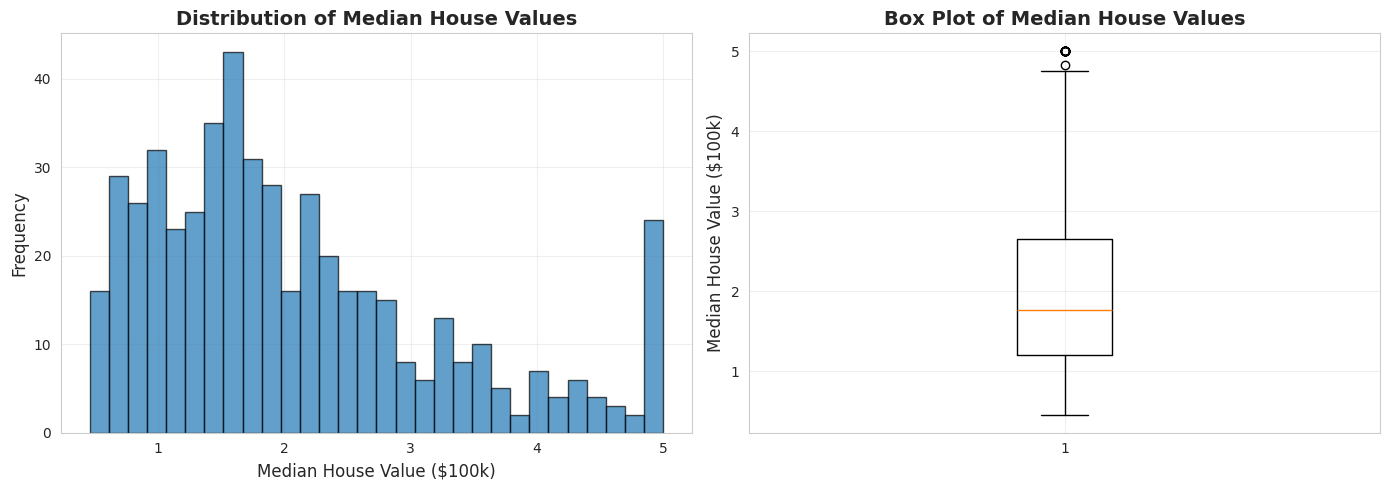


Target Variable Statistics:
  Mean: $2.07 (in $100k)
  Median: $1.76 (in $100k)
  Min: $0.46 (in $100k)
  Max: $5.00 (in $100k)
  Std Dev: $1.17 (in $100k)


In [5]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['MedHouseVal'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Median House Value ($100k)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Median House Values', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['MedHouseVal'], vert=True)
axes[1].set_ylabel('Median House Value ($100k)', fontsize=12)
axes[1].set_title('Box Plot of Median House Values', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTarget Variable Statistics:")
print(f"  Mean: ${df['MedHouseVal'].mean():.2f} (in $100k)")
print(f"  Median: ${df['MedHouseVal'].median():.2f} (in $100k)")
print(f"  Min: ${df['MedHouseVal'].min():.2f} (in $100k)")
print(f"  Max: ${df['MedHouseVal'].max():.2f} (in $100k)")
print(f"  Std Dev: ${df['MedHouseVal'].std():.2f} (in $100k)")

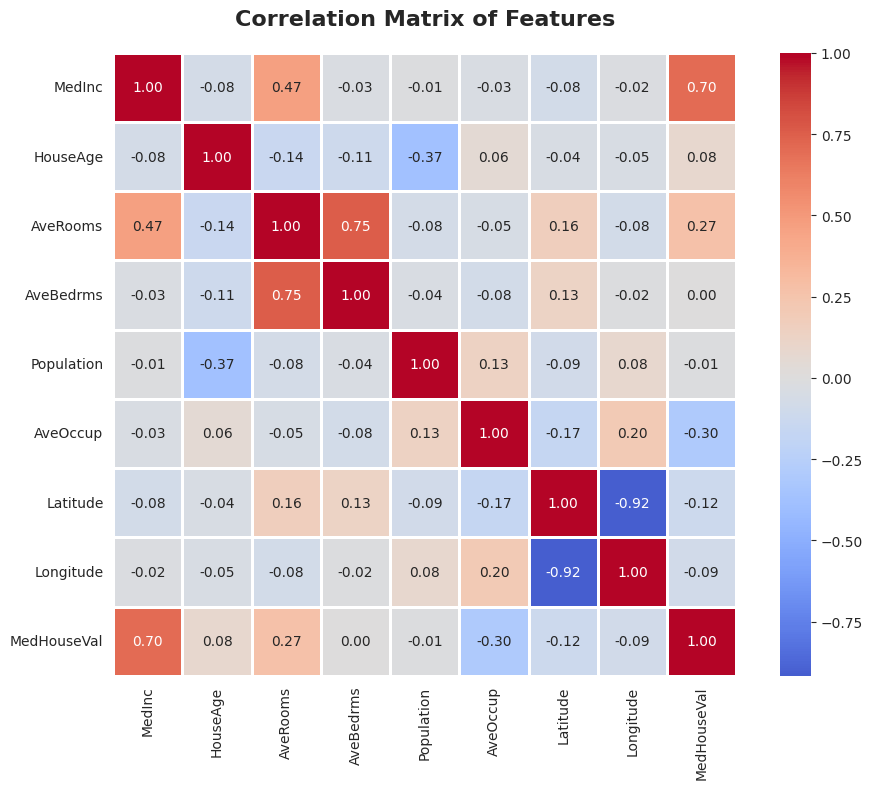


CORRELATION WITH TARGET (MedHouseVal)
MedHouseVal    1.000000
MedInc         0.700615
AveRooms       0.271538
HouseAge       0.084138
AveBedrms      0.001884
Population    -0.011071
Longitude     -0.085480
Latitude      -0.121273
AveOccup      -0.296414
Name: MedHouseVal, dtype: float64


In [6]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CORRELATION WITH TARGET (MedHouseVal)")
print("="*80)
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print(target_corr)

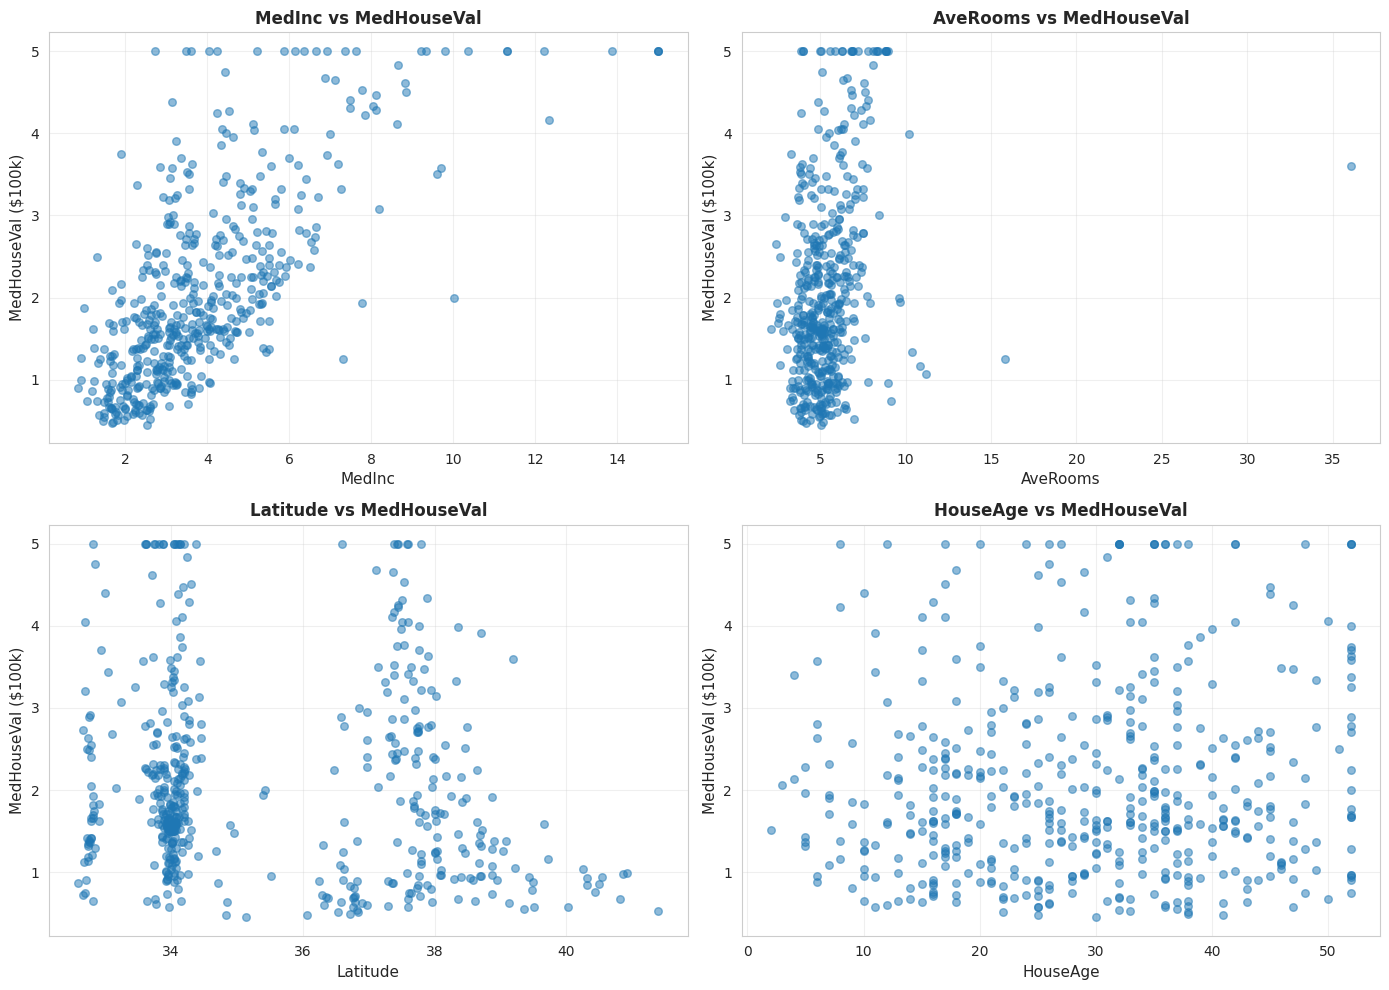

In [7]:
# Scatter plots for top correlated features
top_features = ['MedInc', 'AveRooms', 'Latitude', 'HouseAge']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df['MedHouseVal'], alpha=0.5, s=30)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('MedHouseVal ($100k)', fontsize=11)
    axes[idx].set_title(f'{feature} vs MedHouseVal', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Split Data into Train and Test Sets

In [8]:
# Split into train and test sets (80-20 split)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print("="*80)
print("DATA SPLIT")
print("="*80)
print(f"\nTotal samples: {len(df)}")
print(f"Training samples: {len(train_data)} ({len(train_data)/len(df)*100:.1f}%)")
print(f"Test samples: {len(test_data)} ({len(test_data)/len(df)*100:.1f}%)")

print("\n✓ Data split complete!")

DATA SPLIT

Total samples: 500
Training samples: 400 (80.0%)
Test samples: 100 (20.0%)

✓ Data split complete!


## Step 6: Automatic Feature Engineering (Preview)

Let's see what AutoGluon does automatically with our features:

In [9]:
# Preview automatic feature engineering
from autogluon.features.generators import AutoMLPipelineFeatureGenerator

# Create feature generator
feature_generator = AutoMLPipelineFeatureGenerator()

# Get features only (exclude target)
X_train = train_data.drop('MedHouseVal', axis=1)

# Fit and transform
print("="*80)
print("AUTOMATIC FEATURE ENGINEERING")
print("="*80)
X_transformed = feature_generator.fit_transform(X=X_train)

print("\n" + "="*80)
print("TRANSFORMED FEATURES")
print("="*80)
print(f"\nOriginal features: {X_train.shape[1]}")
print(f"Transformed features: {X_transformed.shape[1]}")
print(f"\nTransformed data shape: {X_transformed.shape}")
print("\nFirst 5 rows:")
print(X_transformed.head())

AUTOMATIC FEATURE ENGINEERING

TRANSFORMED FEATURES

Original features: 8
Transformed features: 8

Transformed data shape: (400, 8)

First 5 rows:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
249  4.4489      16.0  5.966549   1.051056      1674.0  2.947183     38.69   
433  2.2961      46.0  3.431818   0.901515       533.0  4.037879     34.06   
19   2.1875      27.0  5.267176   1.030534       810.0  3.091603     37.43   
322  2.2095      36.0  3.664407   1.115254      1337.0  2.266102     34.16   
332  5.1207      34.0  5.063939   0.984655       970.0  2.480818     37.53   

     Longitude  
249    -121.27  
433    -118.20  
19     -120.97  
322    -118.13  
332    -122.28  


## Step 7: Train Model with AutoGluon

Now let's train models using AutoGluon. We'll use **fast training settings** to get results quickly.

In [10]:
# Define the target column
label = 'MedHouseVal'

print("="*80)
print("TRAINING AUTOGLUON MODELS")
print("="*80)
print(f"\n⚡ Fast training mode enabled")
print(f"   - Time limit: 60 seconds")
print(f"   - Preset: 'medium_quality'")
print(f"   - Training samples: {len(train_data)}")
print("\n" + "="*80)

# Create TabularPredictor
predictor = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    path='ag_california_housing'
)

# Train with fast settings
predictor.fit(
    train_data=train_data,
    time_limit=60,  # 60 seconds only!
    presets='medium_quality',  # Fast training preset
    verbosity=2
)

print("\n" + "="*80)
print("✓ MODEL TRAINING COMPLETE!")
print("="*80)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       11.38 GB / 12.67 GB (89.8%)
Disk Space Avail:   61.62 GB / 107.72 GB (57.2%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'


TRAINING AUTOGLUON MODELS

⚡ Fast training mode enabled
   - Time limit: 60 seconds
   - Preset: 'medium_quality'
   - Training samples: 400



Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "/content/ag_california_housing"
Train Data Rows:    400
Train Data Columns: 8
Label Column:       MedHouseVal
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11654.15 MB
	Train Data (Original)  Memory Usage: 0.02 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 8 | ['MedInc', 'Hou


✓ MODEL TRAINING COMPLETE!


## Step 8: Model Evaluation

In [11]:
# Evaluate on test data
print("="*80)
print("MODEL EVALUATION ON TEST DATA")
print("="*80)

test_score = predictor.evaluate(test_data, silent=True)

print("\nTest Set Performance:")
for metric, value in test_score.items():
    print(f"  {metric}: {value:.4f}")

# Get RMSE in dollars (remember the target is in $100k)
rmse_dollars = abs(test_score['root_mean_squared_error']) * 100000
print(f"\n💰 RMSE in actual dollars: ${rmse_dollars:,.2f}")

MODEL EVALUATION ON TEST DATA

Test Set Performance:
  root_mean_squared_error: -0.5534
  mean_squared_error: -0.3062
  mean_absolute_error: -0.3931
  r2: 0.8038
  pearsonr: 0.8982
  median_absolute_error: -0.2940

💰 RMSE in actual dollars: $55,336.29


## Step 9: Model Leaderboard

In [12]:
# Display leaderboard
print("="*80)
print("MODEL LEADERBOARD")
print("="*80)

leaderboard = predictor.leaderboard(test_data, silent=True)
print("\n", leaderboard)

# Get best model
best_model = leaderboard.iloc[0]['model']
best_score = leaderboard.iloc[0]['score_test']

print("\n" + "="*80)
print(f"🏆 Best Model: {best_model}")
print(f"📊 Test Score: {best_score:.4f}")
print("="*80)

MODEL LEADERBOARD

                  model  score_test  score_val              eval_metric  \
0  WeightedEnsemble_L2   -0.553363  -0.560109  root_mean_squared_error   
1        ExtraTreesMSE   -0.560748  -0.676056  root_mean_squared_error   
2      RandomForestMSE   -0.568953  -0.695477  root_mean_squared_error   
3             CatBoost   -0.578452  -0.646082  root_mean_squared_error   
4       NeuralNetTorch   -0.580452  -0.565569  root_mean_squared_error   
5           LightGBMXT   -0.580678  -0.649759  root_mean_squared_error   
6             LightGBM   -0.592009  -0.636793  root_mean_squared_error   
7        LightGBMLarge   -0.623226  -0.793506  root_mean_squared_error   
8      NeuralNetFastAI   -0.645080  -0.656433  root_mean_squared_error   
9              XGBoost   -0.667813  -0.727954  root_mean_squared_error   

   pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  \
0        0.020875       0.011443   8.804132                 0.003820   
1        0.136487    

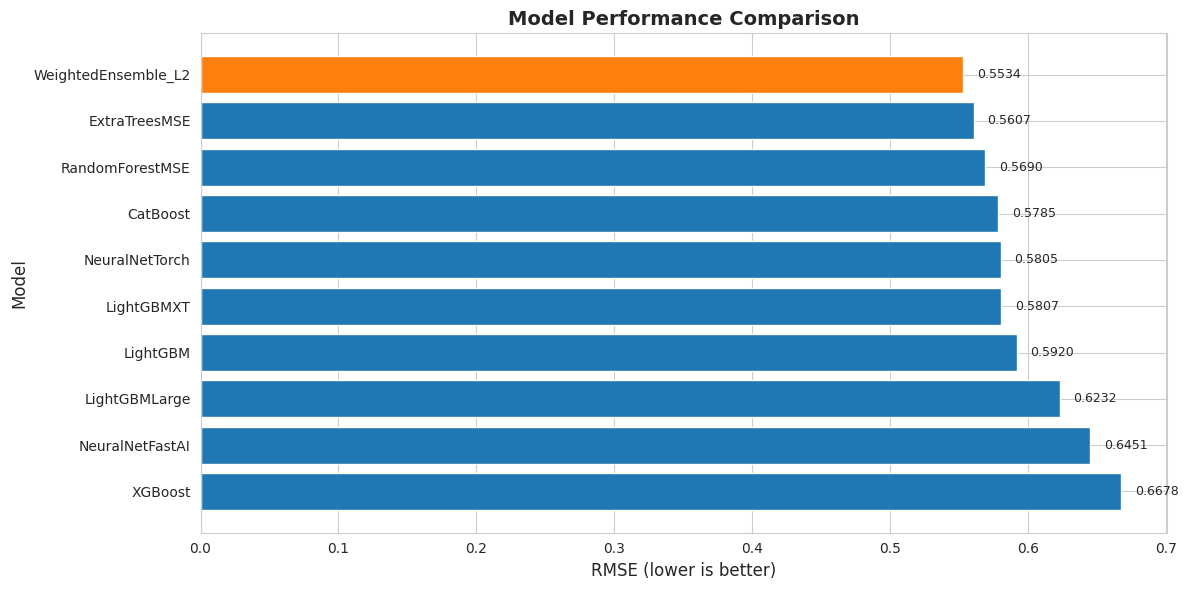

In [13]:
# Visualize model performance
plt.figure(figsize=(12, 6))
models = leaderboard['model'].head(10)
scores = -leaderboard['score_test'].head(10)  # Negative RMSE, so negate for visualization

colors = ['#1f77b4' if i > 0 else '#ff7f0e' for i in range(len(models))]
bars = plt.barh(models, scores, color=colors)
plt.xlabel('RMSE (lower is better)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (model, score) in enumerate(zip(models, scores)):
    plt.text(score + 0.01, i, f'{score:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Step 10: Feature Importance Analysis

Computing feature importance via permutation shuffling for 8 features using 100 rows with 5 shuffle sets...
	1.22s	= Expected runtime (0.24s per shuffle set)
	0.2s	= Actual runtime (Completed 5 of 5 shuffle sets)


FEATURE IMPORTANCE

             importance    stddev   p_value  n  p99_high   p99_low
MedInc        0.913477  0.081967  0.000008  5  1.082248  0.744706
Longitude     0.312635  0.030403  0.000011  5  0.375236  0.250034
Latitude      0.276955  0.054227  0.000168  5  0.388608  0.165302
AveOccup      0.199846  0.055276  0.000636  5  0.313660  0.086032
HouseAge      0.082567  0.017393  0.000223  5  0.118380  0.046755
AveRooms      0.032007  0.016573  0.006231  5  0.066132 -0.002117
AveBedrms     0.010927  0.020778  0.152409  5  0.053709 -0.031855
Population   -0.010715  0.013416  0.925664  5  0.016910 -0.038340


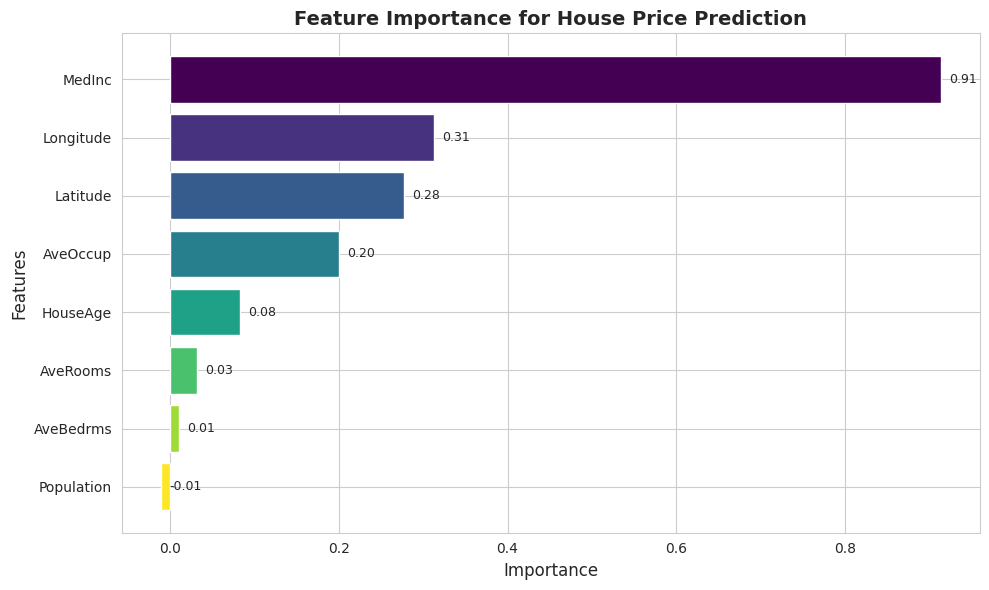


KEY INSIGHTS

Most important feature: MedInc
Least important feature: Population


In [14]:
# Get feature importance
print("="*80)
print("FEATURE IMPORTANCE")
print("="*80)

feature_importance = predictor.feature_importance(test_data)
print("\n", feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
features = feature_importance.index
importance = feature_importance['importance']

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
bars = plt.barh(features, importance, color=colors)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for House Price Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (feat, imp) in enumerate(zip(features, importance)):
    plt.text(imp + 0.01, i, f'{imp:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print(f"\nMost important feature: {features[0]}")
print(f"Least important feature: {features[-1]}")

## Step 11: Make Predictions

In [15]:
# Make predictions on test set
predictions = predictor.predict(test_data)

print("="*80)
print("PREDICTIONS")
print("="*80)
print(f"\nNumber of predictions: {len(predictions)}")
print("\nFirst 10 predictions:")
print(predictions.head(10))

# Compare predictions with actual values
comparison = pd.DataFrame({
    'Actual': test_data['MedHouseVal'].values,
    'Predicted': predictions.values,
    'Error': test_data['MedHouseVal'].values - predictions.values,
    'Abs_Error': abs(test_data['MedHouseVal'].values - predictions.values)
})

print("\n" + "="*80)
print("PREDICTION COMPARISON (First 10)")
print("="*80)
print(comparison.head(10))

print("\n" + "="*80)
print("PREDICTION STATISTICS")
print("="*80)
print(f"\nMean Absolute Error: ${comparison['Abs_Error'].mean() * 100000:,.2f}")
print(f"Median Absolute Error: ${comparison['Abs_Error'].median() * 100000:,.2f}")
print(f"Max Error: ${comparison['Abs_Error'].max() * 100000:,.2f}")
print(f"Min Error: ${comparison['Abs_Error'].min() * 100000:,.2f}")

PREDICTIONS

Number of predictions: 100

First 10 predictions:
361    1.923930
73     1.623009
374    2.983069
155    2.914099
104    2.479661
394    1.583764
377    1.699295
124    1.439571
68     1.752538
450    3.421552
Name: MedHouseVal, dtype: float32

PREDICTION COMPARISON (First 10)
   Actual  Predicted     Error  Abs_Error
0   2.270   1.923930  0.346070   0.346070
1   1.744   1.623009  0.120991   0.120991
2   2.952   2.983069 -0.031069   0.031069
3   2.787   2.914099 -0.127099   0.127099
4   1.824   2.479661 -0.655661   0.655661
5   1.832   1.583764  0.248236   0.248236
6   1.257   1.699295 -0.442295   0.442295
7   1.423   1.439571 -0.016571   0.016571
8   1.625   1.752538 -0.127538   0.127538
9   3.955   3.421552  0.533448   0.533448

PREDICTION STATISTICS

Mean Absolute Error: $39,307.25
Median Absolute Error: $29,404.23
Max Error: $286,223.26
Min Error: $646.87


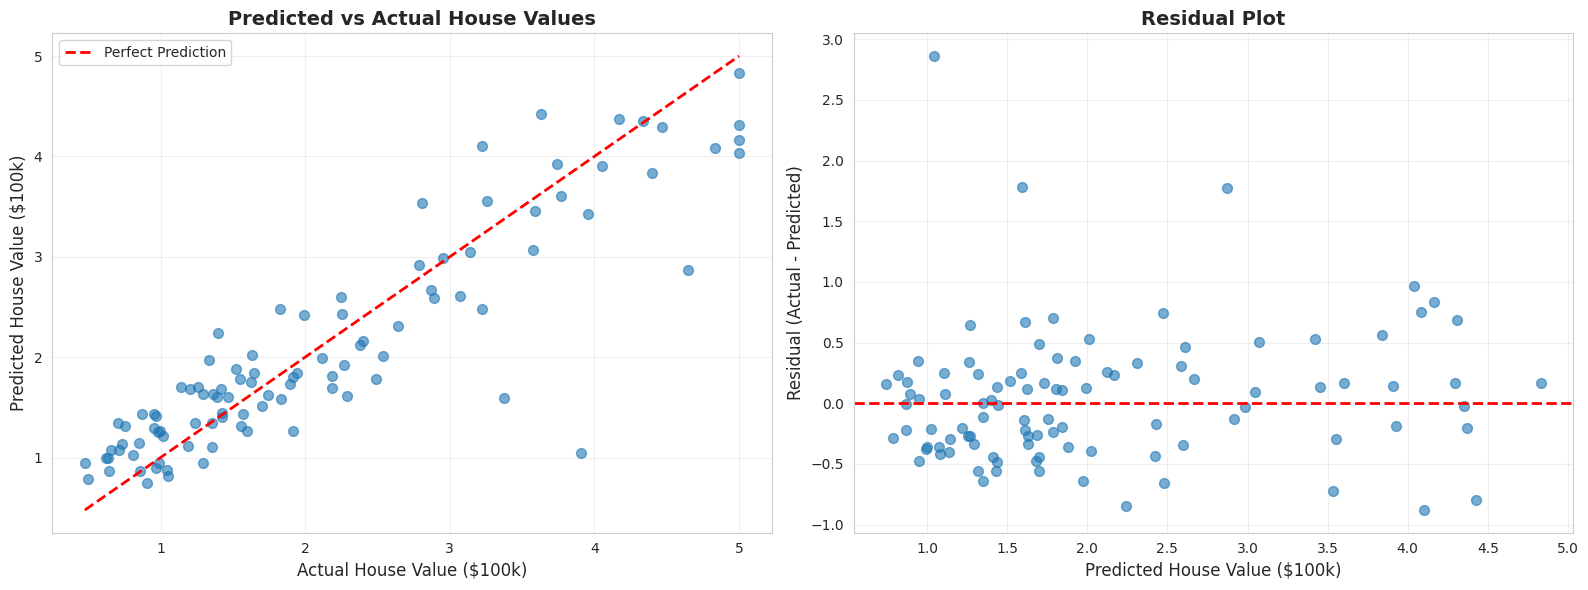

In [16]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Predicted vs Actual
axes[0].scatter(comparison['Actual'], comparison['Predicted'], alpha=0.6, s=50)
axes[0].plot([comparison['Actual'].min(), comparison['Actual'].max()],
             [comparison['Actual'].min(), comparison['Actual'].max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual House Value ($100k)', fontsize=12)
axes[0].set_ylabel('Predicted House Value ($100k)', fontsize=12)
axes[0].set_title('Predicted vs Actual House Values', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Residual plot
axes[1].scatter(comparison['Predicted'], comparison['Error'], alpha=0.6, s=50)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted House Value ($100k)', fontsize=12)
axes[1].set_ylabel('Residual (Actual - Predicted)', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

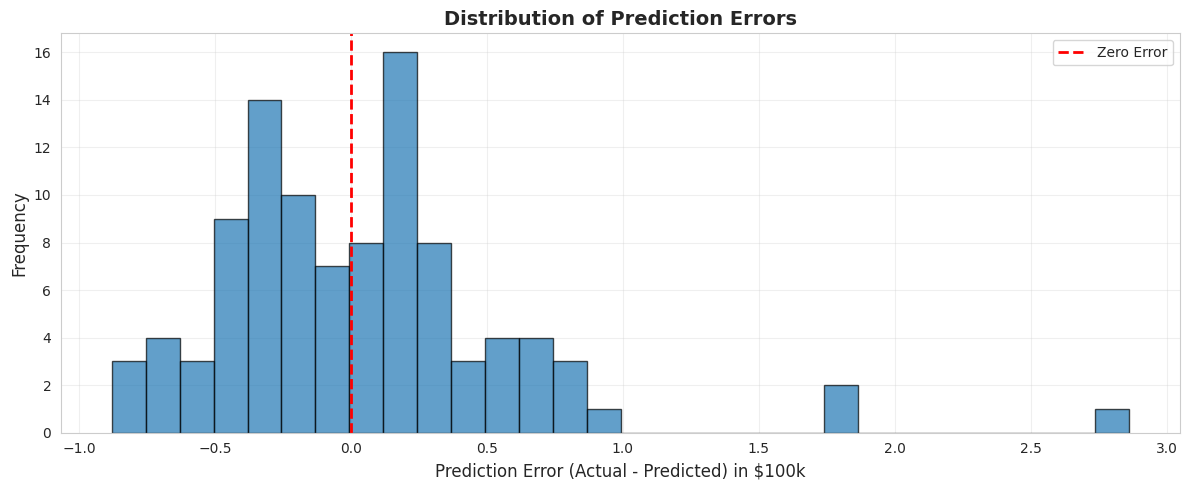

In [17]:
# Distribution of prediction errors
plt.figure(figsize=(12, 5))

plt.hist(comparison['Error'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
plt.xlabel('Prediction Error (Actual - Predicted) in $100k', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 12: Predict on New Data

Let's create a sample house and predict its value:

In [18]:
# Create sample new houses to predict
new_houses = pd.DataFrame({
    'MedInc': [3.5, 8.0, 2.0],
    'HouseAge': [25, 15, 40],
    'AveRooms': [5.5, 7.2, 4.0],
    'AveBedrms': [1.2, 1.5, 1.0],
    'Population': [1200, 800, 2000],
    'AveOccup': [3.2, 2.8, 4.5],
    'Latitude': [34.0, 37.5, 33.5],
    'Longitude': [-118.0, -122.0, -117.5]
})

print("="*80)
print("NEW HOUSES TO PREDICT")
print("="*80)
print("\n", new_houses)

# Make predictions
new_predictions = predictor.predict(new_houses)

print("\n" + "="*80)
print("PREDICTIONS FOR NEW HOUSES")
print("="*80)

results = new_houses.copy()
results['Predicted_Value'] = new_predictions
results['Predicted_Value_Dollars'] = new_predictions * 100000

print("\n", results)

print("\n" + "="*80)
print("PREDICTED HOUSE VALUES")
print("="*80)
for i, pred in enumerate(new_predictions):
    print(f"\nHouse {i+1}:")
    print(f"  Median Income: ${new_houses.iloc[i]['MedInc'] * 10000:,.0f}")
    print(f"  House Age: {new_houses.iloc[i]['HouseAge']} years")
    print(f"  Average Rooms: {new_houses.iloc[i]['AveRooms']:.1f}")
    print(f"  📍 Location: ({new_houses.iloc[i]['Latitude']}, {new_houses.iloc[i]['Longitude']})")
    print(f"  💰 Predicted Value: ${pred * 100000:,.2f}")

NEW HOUSES TO PREDICT

    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     3.5        25       5.5        1.2        1200       3.2      34.0   
1     8.0        15       7.2        1.5         800       2.8      37.5   
2     2.0        40       4.0        1.0        2000       4.5      33.5   

   Longitude  
0     -118.0  
1     -122.0  
2     -117.5  

PREDICTIONS FOR NEW HOUSES

    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     3.5        25       5.5        1.2        1200       3.2      34.0   
1     8.0        15       7.2        1.5         800       2.8      37.5   
2     2.0        40       4.0        1.0        2000       4.5      33.5   

   Longitude  Predicted_Value  Predicted_Value_Dollars  
0     -118.0         1.550638             155063.81250  
1     -122.0         4.278520             427851.96875  
2     -117.5         1.291586             129158.62500  

PREDICTED HOUSE VALUES

House 1:
  Median Incom

## Step 13: Model Information and Details

In [20]:
# Get model information
print("="*80)
print("MODEL INFORMATION")
print("="*80)

model_info = predictor.info()

# Get best model from the leaderboard DataFrame
best_model = leaderboard.iloc[0]['model']
print(f"\nBest model: {best_model}")
print(f"Problem type: {predictor.problem_type}")
print(f"Eval metric: {predictor.eval_metric}")
print(f"\nNumber of models trained: {len(predictor.model_names())}")
print(f"Models: {predictor.model_names()}")

MODEL INFORMATION

Best model: WeightedEnsemble_L2
Problem type: regression
Eval metric: root_mean_squared_error

Number of models trained: 10
Models: ['LightGBMXT', 'LightGBM', 'RandomForestMSE', 'CatBoost', 'ExtraTreesMSE', 'NeuralNetFastAI', 'XGBoost', 'NeuralNetTorch', 'LightGBMLarge', 'WeightedEnsemble_L2']
